##📚 Import required libraries (data, ML, visualization, transformers, torch)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

from transformers import pipeline

import torch


## 🤖 Create sentiment analysis model and check its type
"Load HuggingFace sentiment classifier"

"Create sentiment analysis pipeline"

"Initialize transformer model for sentiment detection"

"Setup classifier and verify its type"

In [2]:
classifier =pipeline('sentiment-analysis')
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

##📝 Test the model on a sample sentence

In [3]:
classifier("This is the great movie")

[{'label': 'POSITIVE', 'score': 0.9998694658279419}]

##📝 Test the model on multiple sentences

In [4]:
classifier([
    "This was a great course",
    "I did not understood any of it"
])

[{'label': 'POSITIVE', 'score': 0.9998300075531006},
 {'label': 'NEGATIVE', 'score': 0.9996486902236938}]

##📂 Load tweets dataset and show first 5 rows

In [6]:
tweets =pd.read_csv("/content/Tweets.csv")
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


##📊 Keep only sentiment and text columns, show first 5 rows

In [7]:
df = tweets[["airline_sentiment","text" ]]
df.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


##📊 Plot sentiment distribution of tweets

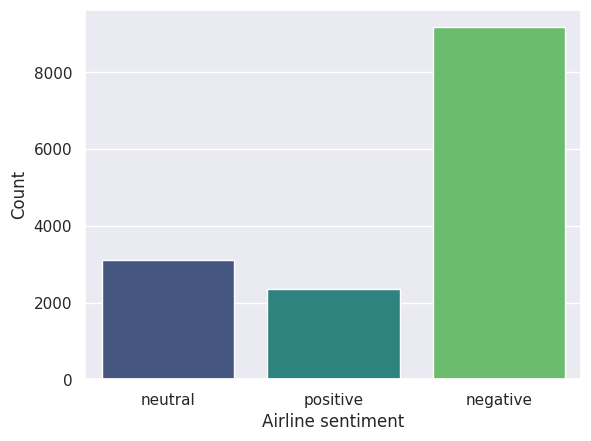

In [8]:
sns.countplot(data=df, x='airline_sentiment', palette='viridis')
plt.xlabel("Airline sentiment")
plt.ylabel("Count")
plt.show()


##🗑️ Remove tweets with neutral sentiment

In [9]:
df =df[df['airline_sentiment']!= 'neutral']

##🎯 Convert sentiment labels into binary target (1=positive, 0=negative)

In [10]:
df['target']=df['airline_sentiment'].map({'positive':1, 'negative':0})

##🔢 Print total number of rows in dataset

In [11]:
print('number of rows:', df.shape[0])

number of rows: 11541


##🤖 Run sentiment model on all tweets and show first 5 predictions

In [12]:
texts = df['text'].tolist()
predictions= classifier(texts)
predictions[:5]

[{'label': 'POSITIVE', 'score': 0.6070863604545593},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553208947181702}]

##📈 Store prediction scores (use score if Positive else 1)

In [32]:
probs = [pred['score'] if pred['label'].startswith('P') else 1 for pred in predictions]


##🔮 Convert predictions into binary values (1=Positive, 0=Negative)

In [33]:
preds =np.array([1 if pred['label'].startswith('P') else 0 for pred in predictions])

##✅ Calculate and print model accuracy

In [34]:
print(f"Accuracy: {round(np.mean(df['target']==preds)*100, 2)} %")

Accuracy: 88.99 %


##📊 Create normalized confusion matrix

In [35]:
cm = confusion_matrix(df['target'], preds, normalize= 'true')

##📊 Define function to plot confusion matrix as heatmap

In [36]:
def plot_confusion_matrix(confusion_matrix, labels):
  plt.figure(figsize=(8,6))
  sns.set(font_scale=1.4)

  sns.heatmap(confusion_matrix, annot=True, fmt ='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title("confusion matrix")
  plt.xlabel("predicted")
  plt.ylabel('actual')
  plt.show()

##📌 Plot the confusion matrix with class labels

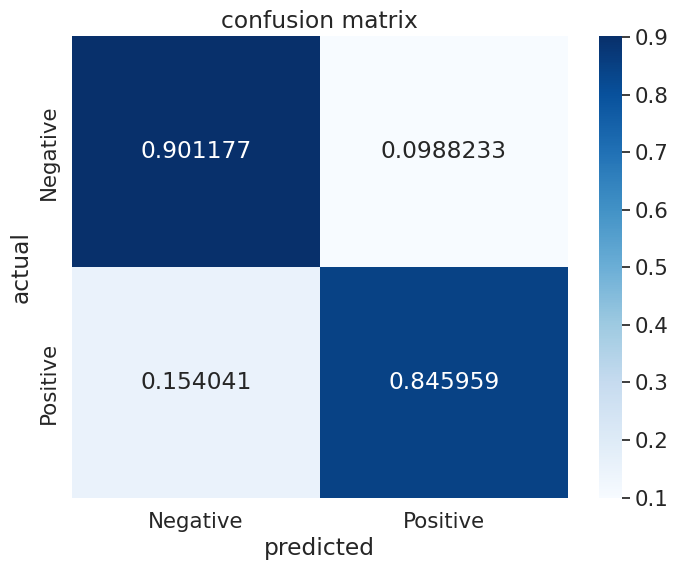

In [37]:
plot_confusion_matrix(cm, ['Negative', 'Positive'])

##📈 Calculate and print ROC-AUC score

In [38]:
print(f'roc auc score: {roc_auc_score(df["target"], probs)}')

roc auc score: 0.15357233395983533
